 2


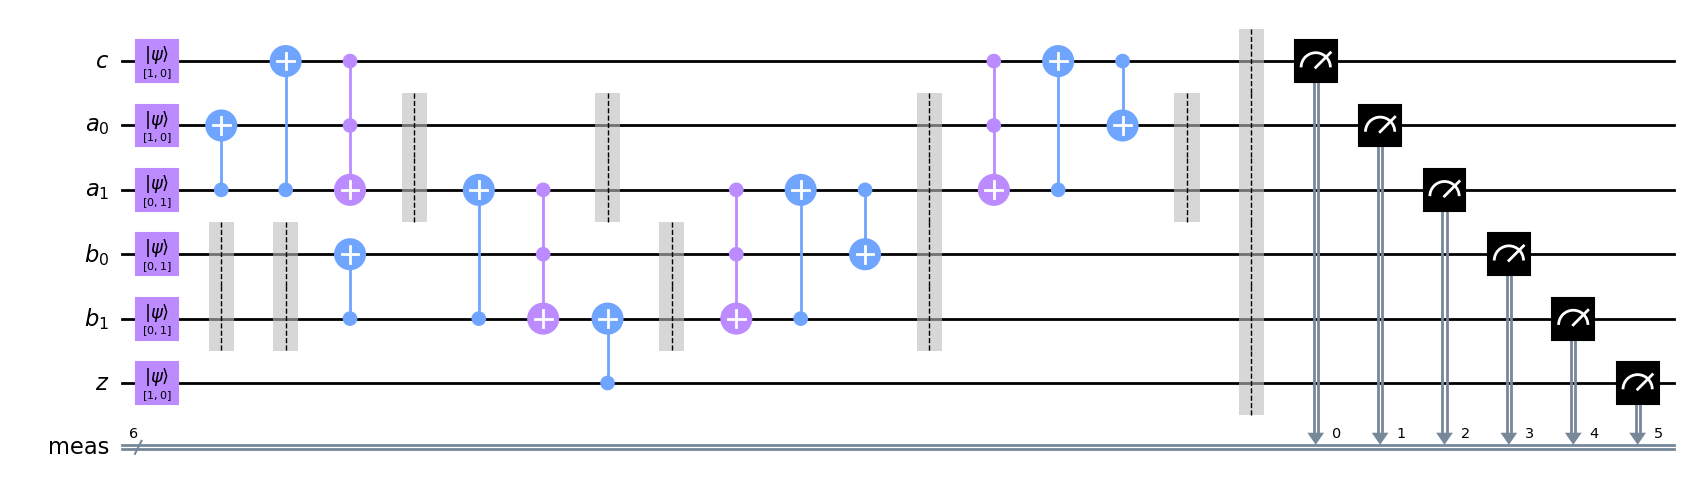

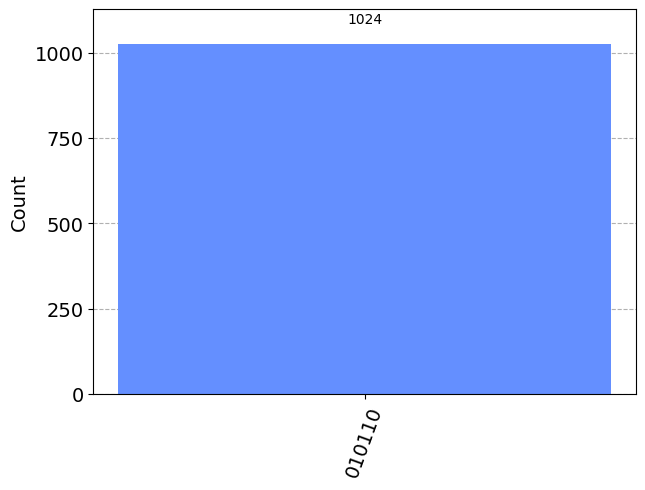

In [6]:
import qiskit as q
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile,Aer 
from qiskit.visualization import plot_histogram, plot_bloch_multivector
%matplotlib inline

n=int(input())
qrc = QuantumRegister(1, 'c')
qr = QuantumRegister(n, 'a')
qra = QuantumRegister(n, 'b')
qrz = QuantumRegister(1, 'z')

circuit = q.QuantumCircuit(qrc,qr,qra,qrz)



ak=[[1,0],[0,1]]




circuit.initialize([1,0],0)
circuit.initialize([1,0],2*n+1)


circuit.initialize(ak[0],1)
circuit.initialize([0,1],2)
circuit.initialize([0,1],3)
circuit.initialize([0,1],4)   
        


for j in range(n):
    circuit.barrier(qra)
    circuit.cx(2+2*j,1+2*j)
    circuit.cx(2+j*2,0+j*2)
    circuit.ccx(0+j*2,1+2*j,2+2*j)
    circuit.barrier(qr)


circuit.cx(2*n+1,2*n)
 

for j in reversed(range(n)):
    circuit.barrier(qra)
    circuit.ccx(0+j*2,1+2*j,2+2*j)
    circuit.cx(2+j*2,0+j*2)
    circuit.cx(0+2*j,1+2*j)
    circuit.barrier(qr)
    

circuit.measure_all()


display(circuit.draw())
circuit.draw()

aer_sim = Aer.get_backend('aer_simulator')
job = aer_sim.run(circuit)
plot_histogram(job.result().get_counts())


